In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #for data analysis
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # for scaling and pre processing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv('water_potability.csv')

In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Text(0, 0.5, 'Percentage of missing values')

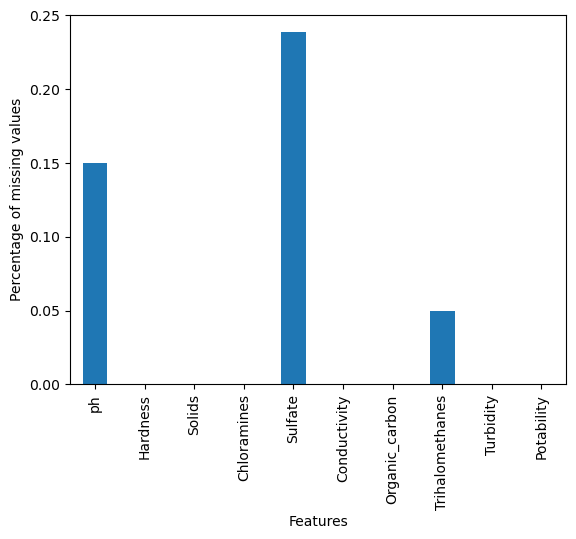

In [5]:
df.isnull().mean().plot.bar()
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

In [6]:
# Removing null values
df['ph']=df['ph'].fillna(df['ph'].mean())
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

<Axes: >

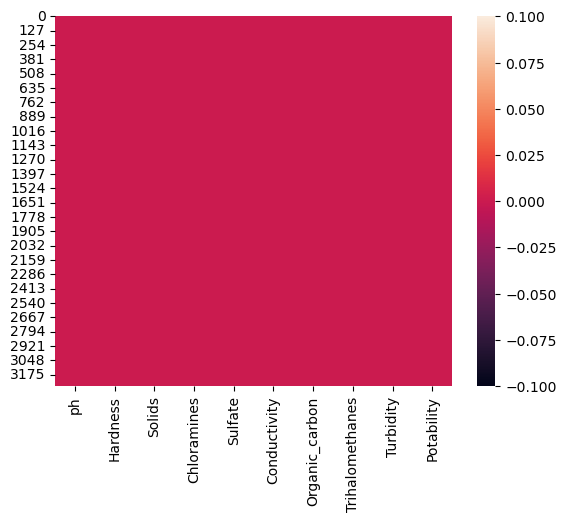

In [7]:
sns.heatmap(df.isnull())

In [8]:
x=df.drop('Potability', axis=1)
y=df['Potability']

In [9]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
print(x)

[[-6.04313345e-16  2.59194711e-01 -1.39470871e-01 ... -1.18065057e+00
   1.30614943e+00 -1.28629758e+00]
 [-2.28933938e+00 -2.03641367e+00 -3.85986650e-01 ...  2.70597240e-01
  -6.38479983e-01  6.84217891e-01]
 [ 6.92867789e-01  8.47664833e-01 -2.40047337e-01 ...  7.81116857e-01
   1.50940884e-03 -1.16736546e+00]
 ...
 [ 1.59125368e+00 -6.26829230e-01  1.27080989e+00 ... -9.81329234e-01
   2.18748247e-01 -8.56006782e-01]
 [-1.32951593e+00  1.04135450e+00 -1.14405809e+00 ... -9.42063817e-01
   7.03468419e-01  9.50797383e-01]
 [ 5.40150905e-01 -3.85462310e-02 -5.25811937e-01 ...  5.60940070e-01
   7.80223466e-01 -2.12445866e+00]]


In [10]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape


((2620, 9), (656, 9))

In [12]:
# Logistic Regression
# object of LR

model_lr=LogisticRegression()


In [13]:
# Traing model

model_lr.fit(X_train, y_train)

LogisticRegression()

In [14]:
#making prediction 
prediction_lg=model_lr.predict(X_test)
prediction_lg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
cm2=confusion_matrix(y_test, prediction_lg)
cm2

array([[412,   0],
       [244,   0]], dtype=int64)

In [16]:
#checking accuracy

acc_score_lg=accuracy_score(y_test, prediction_lg)
acc_score_lg

0.6280487804878049

Decision Tree Classifier

In [17]:
 #creating object model

model_dt=DecisionTreeClassifier(max_depth=4)


In [18]:
# Training Decision Tree

model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [19]:
# Making prediction using DT

pred_dt=model_dt.predict(X_test)

In [20]:
# Confusion matrix

cm2=confusion_matrix(y_test, pred_dt)
cm2

array([[341,  71],
       [169,  75]], dtype=int64)

In [21]:
# Checking Accuracy

acc_score_dt=accuracy_score(y_test, pred_dt)
acc_score_dt

0.6341463414634146

K-Nearest_neighbor

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
for i in range(4, 15):
    model_knn=KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, y_train)
    pridict_knn=model_knn.predict(X_test)
    acc_score_knn=accuracy_score(y_test, pridict_knn)
    print(acc_score_knn)

0.6509146341463414
0.6265243902439024
0.6463414634146342
0.6326219512195121
0.635670731707317
0.6402439024390244
0.6570121951219512
0.6524390243902439
0.6539634146341463
0.6524390243902439
0.6615853658536586


In [24]:
model_knn=KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train, y_train)
pridict_knn=model_knn.predict(X_test)
acc_score_knn=accuracy_score(y_test, pridict_knn)
print(acc_score_knn)

0.6570121951219512


Support Vector Machine

In [25]:
from sklearn.svm import SVC
model_svc=SVC(kernel="rbf")

In [26]:
model_svc.fit(X_train, y_train)

SVC()

In [27]:
# Make pridiction
pred_svm=model_svc.predict(X_test)

In [28]:
acc_score_svm=accuracy_score(y_test, pred_svm)
print(acc_score_svm)

0.6951219512195121
